In [0]:
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import np_utils

In [0]:
with open('train_image.pkl', 'rb') as f:
    train_images = pickle.load(f)

with open('train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f)

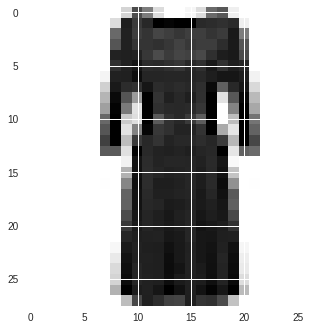

In [51]:
train_images = np.array(train_images).reshape((8000, 28, 28, 1)).astype('uint8')
img = Image.fromarray(train_images[5000].reshape((28, 28)).astype('uint8'), 'L')
plt.imshow(img)

In [52]:
for i in range(len(train_labels)):
  if train_labels[i] == 2:
    train_labels[i] = 1
  elif train_labels[i] == 3:
    train_labels[i] = 2
  elif train_labels[i] == 6:
    train_labels[i] = 3
    
print(set(train_labels))

{0, 1, 2, 3}


1
(8000, 4)
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


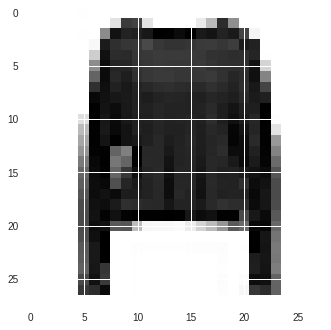

In [53]:
train_images, train_labels = shuffle(train_images, train_labels)
img = Image.fromarray(train_images[5000].reshape((28, 28)).astype('uint8'), 'L')
print(train_labels[5000])
plt.imshow(img)

train_images = train_images.astype('float32')/255.0
train_labels = np_utils.to_categorical(train_labels, 4)
print(train_labels.shape)
print(train_labels)

In [54]:
model = Sequential()
inputShape = (28, 28, 1)


model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation("softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_31 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
__________

In [55]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
history = model.fit(train_images, train_labels, validation_split = 0.2, shuffle = True, batch_size = 128, epochs=100)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 5s 757us/step - loss: 1.1509 - acc: 0.6650 - val_loss: 0.6556 - val_acc: 0.7819
Epoch 2/100
6400/6400 [==============================] - 2s 308us/step - loss: 0.7504 - acc: 0.7450 - val_loss: 0.5515 - val_acc: 0.7906
Epoch 3/100
6400/6400 [==============================] - 2s 310us/step - loss: 0.6102 - acc: 0.7827 - val_loss: 0.4377 - val_acc: 0.8344
Epoch 4/100
6400/6400 [==============================] - 2s 307us/step - loss: 0.5466 - acc: 0.8066 - val_loss: 0.4297 - val_acc: 0.8394
Epoch 5/100
6400/6400 [==============================] - 2s 308us/step - loss: 0.5129 - acc: 0.8094 - val_loss: 0.4401 - val_acc: 0.8337
Epoch 6/100
6400/6400 [==============================] - 2s 304us/step - loss: 0.4709 - acc: 0.8206 - val_loss: 0.4188 - val_acc: 0.8356
Epoch 7/100
6400/6400 [==============================] - 2s 306us/step - loss: 0.4416 - acc: 0.8355 - val_loss: 0.4246 - val_acc: 